*Записать некоторую матрицу плотности ротатора, проверить её на
наличие противоречий.*

In [ ]:
import numpy as np
from sympy import symbols, Matrix, sqrt
from sympy.physics.wigner import wigner_3j
from math import pi

In [ ]:
matrix = np.array([
    [0.1, 0.3, 0.2, 0.7, 0.5],
    [0.3, 0.1, 0.2, 0.1, 0.9],
    [0.2, 0.2, 0.1, 0.4, 0.3],
    [0.7, 0.1, 0.4, 0.1, 0.1],
    [0.5, 0.9, 0.3, 0.1, 0.6]
])

In [ ]:
np.trace(matrix)

1.0

In [ ]:
matrix_trans = np.transpose(matrix)
if matrix_trans.all() == matrix.all():
  print("Матрица симметричная.")
else:
  print("Матрица несимметричная.")

Матрица симметричная.


С помощью матриц Tkq найти коэффициенты разложения матрицы плотности по неприводимым компонентам ρkq
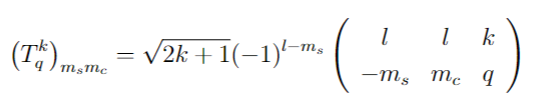

In [ ]:
l = 2
Tkq = np.zeros((2 * l + 1, 2 * (2 * l + 1) + 1, 2 * l + 1, 2 * l + 1))
for k in range(0, 2 * l + 1):
  for q in range(-k, k + 1):
    for ms in range(-l, l + 1):
      for mc in range(-l, l + 1):
        Tkq[k, q, ms, mc] = np.sqrt(2 * k + 1)*(-1)**(l - ms)*wigner_3j(l, l, k, -ms, mc, q)

for k in range(0, 2*l + 1):
  for q in range(-k, k + 1):
    print("k =", k, " q =", q)
    print(np.array_str(Tkq[k, q], precision=3, suppress_small=True), "\n")


k = 0  q = 0
[[0.447 0.    0.    0.    0.   ]
 [0.    0.447 0.    0.    0.   ]
 [0.    0.    0.447 0.    0.   ]
 [0.    0.    0.    0.447 0.   ]
 [0.    0.    0.    0.    0.447]] 

k = 1  q = -1
[[ 0.    -0.548  0.     0.     0.   ]
 [ 0.     0.    -0.447  0.     0.   ]
 [ 0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.447]
 [-0.548  0.     0.     0.     0.   ]] 

k = 1  q = 0
[[ 0.     0.     0.     0.     0.   ]
 [ 0.    -0.316  0.     0.     0.   ]
 [ 0.     0.    -0.632  0.     0.   ]
 [ 0.     0.     0.     0.632  0.   ]
 [ 0.     0.     0.     0.     0.316]] 

k = 1  q = 1
[[0.    0.    0.    0.    0.548]
 [0.548 0.    0.    0.    0.   ]
 [0.    0.447 0.    0.    0.   ]
 [0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.447 0.   ]] 

k = 2  q = -2
[[0.    0.    0.535 0.    0.   ]
 [0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.   ]
 [0.535 0.    0.    0.    0.   ]
 [0.    0.655 0.    0.    0.   ]] 

k = 2  q = -1
[[ 0.     0.267  0.     0.   

In [ ]:
matrix_ro = np.zeros((2*l + 1, 2*(2*l + 1) + 1))
for k in range(0, 2*l + 1):
  for q in range(-k, k + 1):
    matrix_ro[k, q] = np.sum(matrix * Tkq[k, q])
print(np.array_str(matrix_ro, precision=3, suppress_small=True), "\n")

[[ 0.447  0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.   ]
 [ 0.158  0.572  0.     0.     0.     0.     0.     0.     0.     0.
  -0.572]
 [-0.134 -0.012  1.07   0.     0.     0.     0.     0.     0.     1.07
   0.012]
 [-0.316 -0.193  0.354  0.283  0.     0.     0.     0.    -0.283  0.354
   0.193]
 [-0.239 -0.158 -0.264 -0.141  0.4    0.     0.     0.4    0.141 -0.264
   0.158]] 



In [ ]:
# проверим корректность разложения
print(np.array_str(sum([matrix_ro[k,q]*Tkq[k,q] for k in range(0, 2*l+1) for q in range(-k, k+1)]), precision=3, suppress_small=True), "\n")

[[0.1 0.3 0.2 0.7 0.5]
 [0.3 0.1 0.2 0.1 0.9]
 [0.2 0.2 0.1 0.4 0.3]
 [0.7 0.1 0.4 0.1 0.1]
 [0.5 0.9 0.3 0.1 0.6]] 



Зная правило преобразования матриц Tkq при вращении системы координат, найти неприводимые компоненты ρ'kq матрицы плотности в новой системе координат, повёрнутой на заданные углы Эйлера

In [ ]:
!pip install spherical

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 784.8/784.8 kB 10.5 MB/s eta 0:00:00


In [ ]:
import spherical
import quaternionic

In [ ]:
alpha = np.pi
beta = 2 * np.pi
gamma = 0
R = quaternionic.array.from_euler_angles(alpha, beta, gamma)
wigner = spherical.Wigner(2*l)
D = wigner.D(1/R)
matrix_ro_new = np.zeros((2*l + 1, 2 * (2 * l + 1) + 1))
for k in range(2*l+1):
  for qp in range(-k, k+1):
    matrix_ro_new[k, qp] = np.real(sum(np.conjugate(D[wigner.Dindex(k, q, qp)])*matrix_ro[k, q] for q in range(-k, k+1)))
print(np.array_str(matrix_ro_new, precision=3, suppress_small=True), "\n")

[[ 0.447  0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.   ]
 [ 0.158 -0.572  0.     0.     0.     0.     0.     0.     0.     0.
   0.572]
 [-0.134  0.012  1.07   0.     0.     0.     0.     0.     0.     1.07
  -0.012]
 [-0.316  0.193  0.354 -0.283  0.     0.     0.     0.     0.283  0.354
  -0.193]
 [-0.239  0.158 -0.264  0.141  0.4    0.     0.     0.4   -0.141 -0.264
  -0.158]] 



Используя неприводимые компоненты матрицы плотности построить матрицу плотности ρ′ в первоначальном представлении проекций момента, но в новой системе координат

In [ ]:
result = sum([matrix_ro_new[k, q]*Tkq[k, q] for k in range(0, 2*l+1) for q in range (-k, k+1)])
np.round(result, 3)

array([[ 0.1, -0.3,  0.2,  0.7, -0.5],
       [-0.3,  0.1, -0.2, -0.1,  0.9],
       [ 0.2, -0.2,  0.1,  0.4, -0.3],
       [ 0.7, -0.1,  0.4,  0.1, -0.1],
       [-0.5,  0.9, -0.3, -0.1,  0.6]])